<a href="https://colab.research.google.com/github/farzin23i/SciSchool-Introduction_to_Machine_Learning/blob/main/week2/ML_2_1_SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import pylab as plt 
import seaborn as sns

In [ ]:
plt.style.use ('seaborn')

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

lm = LinearRegression()
lm.fit (X, y)

LinearRegression()

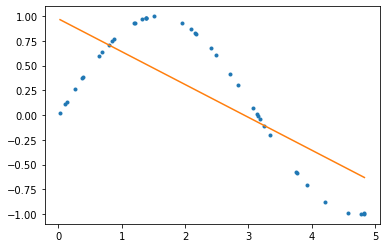

In [ ]:
plt.plot (X, y, '.')
plt.plot (X, lm.predict(X))

# Non-linear Regression

page 68, EfficientLearningMachines,

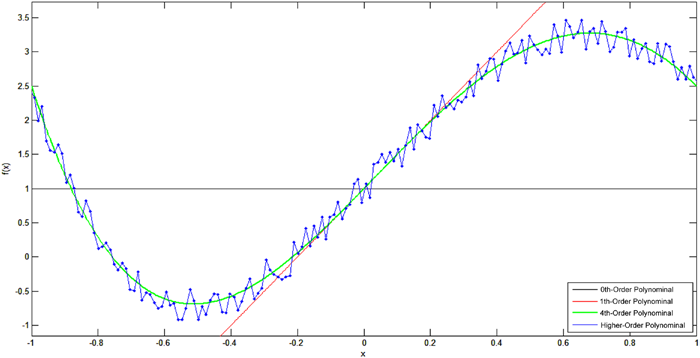

Using Scikit Learn

In [ ]:
from sklearn.svm import SVR

In [ ]:
svr_poly = SVR(kernel= 'poly', degree=3, coef0=1)
svr_lin = SVR(kernel= 'linear', degree=3, coef0=1)

svr_poly.fit (X, y)

SVR(coef0=1, kernel='poly')

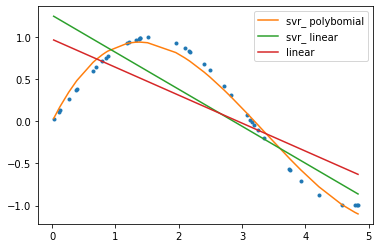

In [ ]:
plt.plot (X, y, '.')

plt.plot (X, svr_poly.predict (X), label= 'svr_ polybomial')
plt.plot (X, svr_lin.fit(X,y).predict (X), label= 'svr_ linear')
plt.plot (X, lm.predict(X), label = 'linear')

plt.legend()

## Multi-feature Regression

In [ ]:
df= pd.read_csv ('/content/sample_data/california_housing_train.csv')
df_test= pd.read_csv ('/content/sample_data/california_housing_test.csv')

df.head ()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
df.columns 

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [ ]:
X_train = df[['housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',]]
X_test = df_test[['housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',]]

y_train = df['median_house_value']
y_test = df_test['median_house_value']

In [ ]:
lm = LinearRegression()
lm.fit (X_train, y_train)

LinearRegression()

In [ ]:
lm.score (X_test, y_test)

0.5458835346746116

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


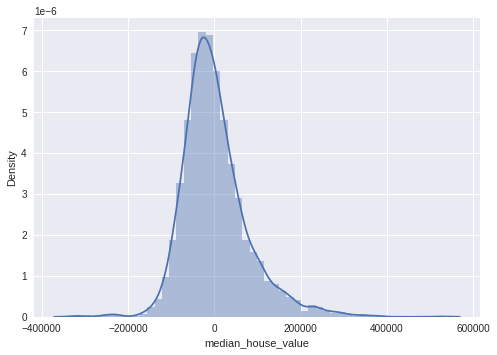

In [ ]:
predictions = lm.predict (X_test)
sns.distplot((y_test-predictions))

### Firstly, We better to scale the data

<center><img src='https://drive.google.com/uc?id=1BS0eUfTmAmmL0JK19iBFzvhJwMN0cN7x' height=400/></center>

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

df[df.columns] = scaler.fit_transform(df)
df_test[df_test.columns] = scaler.transform(df_test)

df.head ()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,1.000000,0.175345,0.274510,0.147885,0.198945,0.028364,0.077454,0.068530,0.107012
1,0.984064,0.197662,0.352941,0.201608,0.294848,0.031559,0.075974,0.091040,0.134228
2,0.975100,0.122210,0.313725,0.018927,0.026847,0.009249,0.019076,0.079378,0.145775
3,0.974104,0.116897,0.254902,0.039515,0.052142,0.014350,0.037000,0.185639,0.120414
4,0.974104,0.109458,0.372549,0.038276,0.050435,0.017405,0.042921,0.098281,0.104125


In [ ]:
X_train = df[['housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',]]
X_test = df_test[['housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',]]

y_train = df['median_house_value']
y_test = df_test['median_house_value']

In [ ]:
svr_poly = SVR(kernel= 'poly', degree=3, coef0=1)

In [ ]:
svr_poly.fit (X_train, y_train)

SVR(coef0=1, degree=5, kernel='poly')

In [ ]:
svr_poly.score (X_test, y_test)

0.6407222648820274

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


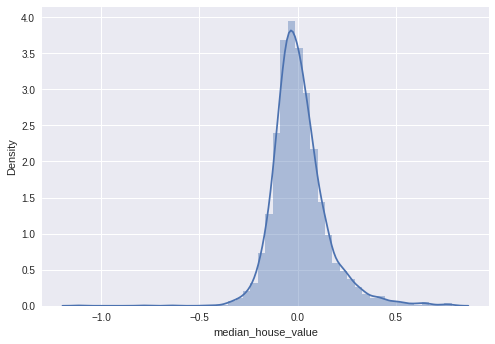

In [ ]:
predictions = svr_poly.predict (X_test)
sns.distplot((y_test-predictions))

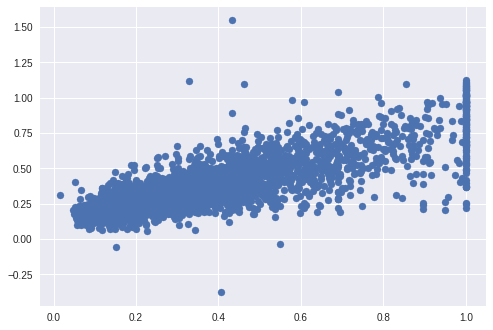

In [ ]:
plt.scatter (y_test, predictions)